<a href="https://colab.research.google.com/github/meyounge/MAT422/blob/main/HM_3_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 3.7

##Problem 3.7.1 Mathematical formulation

In Nueral Networking, everything is turned into an optamization problem, or a curve fitting problem. In general if we find that we have a set of measurements known as observations we can make a prediction about a result. Individual measurements are known as features and a prediction can be anything. It could be about the next point on a line or what animal is in an image, or (in the case of an LLM) what word comes next.

In order to input images into a nueral net normal methods include using convolutions. For a three color image please reference the image below (This image was created by a friend who gave me permission to use it)


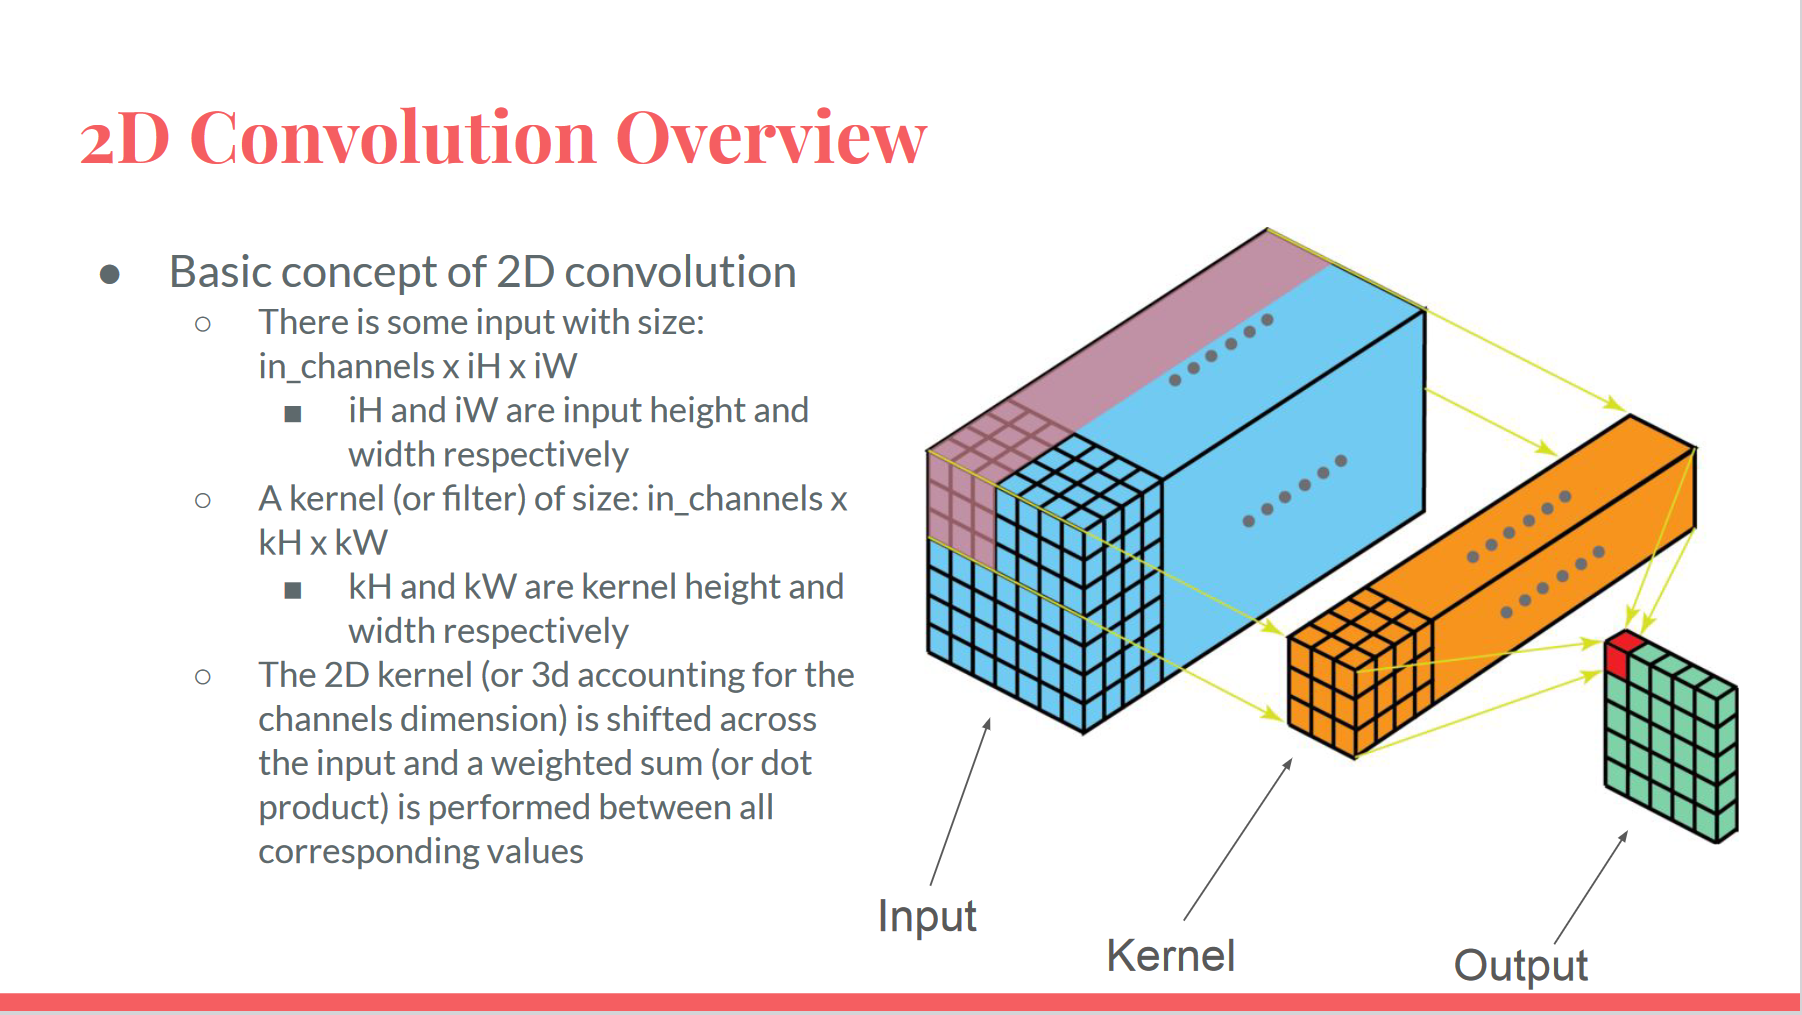

In taking the convolution we are able convert images into values we can use to classify. Below is simple convolution over an image.

In [18]:
import numpy as np


def conv2D(X, kernel, padding=0, stride=1, bias = None):
  X = np.pad(X, pad_width=padding, mode='constant', constant_values=0)
  kernel = np.rot90(np.rot90(kernel))

  n, m = X.shape

  kern = len(kernel)

  out = np.zeros(((n-kern)//stride + 1, (m-kern)//stride + 1))

  i = 0
  while i < len(out):
    j = 0
    while j < len(out[0]):
      out[i, j] = np.sum(X[i : i + kern, j : j + kern] * kernel)
      j += 1
    i += 1

  return out

matrix = np.random.rand(7, 7)
kernel = np.random.rand(3, 3)

print(conv2D(matrix, kernel))
print()

# Check my answer
from scipy.signal import convolve2d

print(convolve2d(matrix, kernel, mode='valid'))


[[2.28868931 2.64929674 2.26960777 1.95695335 2.55946356]
 [2.14516716 2.68588884 2.73274747 2.17998652 1.94138013]
 [2.61382621 3.21590704 2.72576818 2.59576613 2.55823719]
 [2.35072546 2.40015306 2.54530006 2.44236776 2.56802241]
 [2.98119588 3.48946457 3.19689715 2.20289643 1.98815176]]

[[2.28868931 2.64929674 2.26960777 1.95695335 2.55946356]
 [2.14516716 2.68588884 2.73274747 2.17998652 1.94138013]
 [2.61382621 3.21590704 2.72576818 2.59576613 2.55823719]
 [2.35072546 2.40015306 2.54530006 2.44236776 2.56802241]
 [2.98119588 3.48946457 3.19689715 2.20289643 1.98815176]]


##Problem 3.7.2 Activation functions

Next thing we need is an activation function, I like the ReLU activation function as it is the simplist:
$$
f(x) = \begin{cases}
x, & \text{if } x \geq 0 \\
0, & \text{if } x < 0
\end{cases}
$$
There are others as well such as the leaky relu:
$$
f(x) = \begin{cases}
x, & \text{if } x \geq 0 \\
\alpha x, & \text{if } x < 0
\end{cases}
$$
Or the tanh/hyperbolic tangent activation function
$$ f(x) = \tanh(x) $$

These activation function are some of the most common functions you will find. The only requirement for an activation function to be classified as such it be a non-linear function. This is important for machine learning as it is what allows the machine to learn, otherwise we could represent any model as a series of linear operations which would defeat the purpose.

Below are the activation functions from above:

In [35]:
def ReLU(x):
  return np.clip(x, a_min=0, a_max=np.max(x))

def LeakyReLU(x, alpha):
  out = np.zeros(x.shape)
  for i, num in enumerate(x.flatten()):
    if num > 0:
      out[i//len(x), i%len(x)] = num
    else:
      out[i//len(x), i%len(x)] = alpha * num
  return out

def tanh(x):
  return np.tanh(x)

matrix = np.random.rand(5, 5) * 2 - 1

print("Original")
print(matrix)
print("ReLU")
print(ReLU(matrix))
print("Leaky ReLU")
print(np.round(LeakyReLU(matrix, 0.01), 5))

##To test tanh it is best to have numbers greater than 1 and less than -1 as the function will essentialy clamp to them
matrix = matrix * 2
print("Tanh")
print(tanh(matrix))


Original
[[-0.15693812  0.97272805 -0.18359563 -0.0292431  -0.51862736]
 [-0.92993559  0.60825981  0.25796487  0.43977438  0.51429521]
 [-0.25268902  0.1970082   0.46613051 -0.3811278  -0.42464492]
 [ 0.46008538  0.43415838  0.60440299 -0.11907474  0.9836508 ]
 [ 0.87051591  0.10158366  0.77138411 -0.61959811 -0.48745943]]
ReLU
[[0.         0.97272805 0.         0.         0.        ]
 [0.         0.60825981 0.25796487 0.43977438 0.51429521]
 [0.         0.1970082  0.46613051 0.         0.        ]
 [0.46008538 0.43415838 0.60440299 0.         0.9836508 ]
 [0.87051591 0.10158366 0.77138411 0.         0.        ]]
Leaky ReLU
[[-1.5700e-03  9.7273e-01 -1.8400e-03 -2.9000e-04 -5.1900e-03]
 [-9.3000e-03  6.0826e-01  2.5796e-01  4.3977e-01  5.1430e-01]
 [-2.5300e-03  1.9701e-01  4.6613e-01 -3.8100e-03 -4.2500e-03]
 [ 4.6009e-01  4.3416e-01  6.0440e-01 -1.1900e-03  9.8365e-01]
 [ 8.7052e-01  1.0158e-01  7.7138e-01 -6.2000e-03 -4.8700e-03]]
Tanh
[[-0.30395934  0.95996439 -0.35153249 -0.058419

##Problem 3.7.3 Cost function

The cost function, aguably the single most important part of a nueral network. It is what is used to test our model against a set of theoretical values, or outside inputs.

Common loss functions include:

MSE Loss
$$ \text{MSE} = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2 $$

L1 Loss
$$ \text{L1 Loss} = \frac{1}{N} \sum_{i=1}^N |y_i - \hat{y}_i| $$

Kullback Liebler Divergence
$$ \text{KL}(P \parallel Q) = \sum_{i} P(i) \log \frac{P(i)}{Q(i)} $$

We will only be implementing MSE Loss today, and something else important to note, in machine learning in order to decrease convergence time we normaly do not waste time on useless operations such as dividing by N. This is becuase we care more about the general loss than its magnitude, we just need to make sure it goes down based on the input values, not the specifics of the value itself, theoretically the loss is 0 regarless of dividing by the number of elements.

In [71]:
def MSELoss(Y, Y_prime):
  return np.sum((Y - Y_prime)**2)

def MSELoss_gradient(Y, X, W):
  return np.matmul(X.T,(Y - np.matmul(X, W.T)))

inputs = np.random.rand(10, 3)
weights = np.ones((1, 3))
targets = np.random.rand(10, 1)
print("MSE loss equals", MSELoss(targets, np.matmul(inputs, weights.T)))
print("Gradient of MSE Loss equals\n", MSELoss_gradient(targets, inputs, weights))

MSE loss equals 7.6994477758337725
Gradient of MSE Loss equals
 [[-3.74764276]
 [-2.63649003]
 [-3.7752795 ]]


##Problem 3.7.4 Backpropagation

Backpropigation is the idea of updating the weights in a nueral net. Up until this point all neural nets have only been one layer, but bigger networks require something called backpropigation. This means that we have more than one layer, so more than one gradient to descend, below is the math for a convolution layer followed by a linear layer:

Forward Pass:

$$
\mathbf{Z}^{(1)} = \mathbf{X}^{(1)} * \mathbf{W}^{(1)} + \mathbf{b}^{(1)}
$$
where:
- $ \mathbf{X}^{(1)} $ is the input to the convolutional layer,
- $ * $ denotes the 2D convolution operation,
- $ \mathbf{W}^{(1)} $ is the convolution filter (kernel),
- $ \mathbf{b}^{(1)} $ is the bias.

Activation (e.g., ReLU):

$$
\mathbf{A}^{(1)} = \text{ReLU}(\mathbf{Z}^{(1)})
$$

Linear Layer:

$$
\mathbf{Y} = \mathbf{A}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)}
$$
where:
- $ \mathbf{W}^{(2)} $ is the weight matrix of the linear layer,
- $ \mathbf{b}^{(2)} $ is the bias of the linear layer,
- $ \mathbf{A}^{(1)} $ is the flattened output from the convolutional layer.

Backward Pass:

Gradient of the Loss with Respect to Output $ \mathbf{Y} $:

$$
\frac{\partial L}{\partial \mathbf{Y}} = \mathbf{dL}
$$
where $ \mathbf{dL} $ represents the gradient of the loss $ L $ with respect to $ \mathbf{Y} $.

Gradient of the Loss with Respect to $ \mathbf{W}^{(2)} $ and $ \mathbf{b}^{(2)} $:

$$
\frac{\partial L}{\partial \mathbf{W}^{(2)}} = \mathbf{A}^{(1)T} \mathbf{dL}
$$

$$
\frac{\partial L}{\partial \mathbf{b}^{(2)}} = \sum \mathbf{dL}
$$

Gradient of the Loss with Respect to $ \mathbf{A}^{(1)} $ (backpropagate to convolutional layer):

$$
\frac{\partial L}{\partial \mathbf{A}^{(1)}} = \mathbf{dL} \mathbf{W}^{(2)T}
$$

Gradient of the Loss with Respect to $ \mathbf{Z}^{(1)} $:

$$
\frac{\partial L}{\partial \mathbf{Z}^{(1)}} = \frac{\partial L}{\partial \mathbf{A}^{(1)}} \cdot \text{ReLU'}(\mathbf{Z}^{(1)})
$$
where $ \text{ReLU'}(\mathbf{Z}^{(1)}) $ is the derivative of the ReLU function.

Gradient of the Loss with Respect to $ \mathbf{W}^{(1)} $:

$$
\frac{\partial L}{\partial \mathbf{W}^{(1)}} = \mathbf{X}^{(1)} * \frac{\partial L}{\partial \mathbf{Z}^{(1)}}
$$

Gradient of the Loss with Respect to $ \mathbf{b}^{(1)} $:

$$
\frac{\partial L}{\partial \mathbf{b}^{(1)}} = \sum \frac{\partial L}{\partial \mathbf{Z}^{(1)}}
$$

Gradient of the Loss with Respect to Input $ \mathbf{X}^{(1)} $:

$$
\frac{\partial L}{\partial \mathbf{X}^{(1)}} = \frac{\partial L}{\partial \mathbf{Z}^{(1)}} * \mathbf{W}^{(1)T}
$$

The Latex is courtesy of chatGPT, I have looked over it to make sure it is correct (with some errors that I manually corrected). I will be implementing this here on a black and white image, I will be ignoring the bias, and there will be random image noise and output targets. I will be using the MSE loss function

In [92]:
def ReLU_derivative(x):
  return np.where(x > 0, 1.0, 0.0)

def forward(X, W_kernel, W_matrix):
  Z = conv2D(X, W_kernel)
  A = ReLU(Z)
  Y = np.matmul(W_matrix, A)
  return Y

def backpropigate(Y, X, W_matrix, W_kernel):

  Z = conv2D(X, W_kernel)
  A = ReLU(Z)
  dL = Y - np.matmul(A, W_matrix.T)
  dW_matrix = np.matmul(A.T, dL)
  dA = np.matmul(dL, W_matrix)
  dZ = np.matmul(dA, ReLU_derivative(Z))
  dW_kernel = conv2D(X, dZ)
  return dW_kernel, dW_matrix.T

image = np.random.rand(32, 32) #10 32x32 black and white image
target = np.random.randint(0, 3, (28, 1)) # 3 target classes

W_kernel = np.ones((5, 5))
W_matrix = np.ones((1, 28))
print(forward(image, W_kernel, W_matrix))

W_kern, W_mat = backpropigate(target, image, W_matrix, W_kernel)
print(W_kern)
print(W_mat)


[[362.46668008 361.09226871 346.51574226 350.77800048 355.63590427
  345.09622573 358.33555008 363.53127242 351.24343845 339.54607814
  341.82906758 343.68096528 352.13809048 335.84641922 351.4019136
  343.79579267 347.44498902 337.75793465 357.49482233 356.07362119
  357.2531837  357.92963238 356.77462549 355.08852429 363.93000853
  379.60928922 379.83437356 388.65844175]]
[[-3879996.31566688 -3918804.57902676 -3938374.42013631 -3951365.13222696
  -3972174.7722861 ]
 [-3883824.09860615 -3916818.75631096 -3931214.24640643 -3946832.1861962
  -3962227.93282943]
 [-3905943.28677479 -3949034.08480879 -3956007.10238975 -3970971.04948449
  -3979989.25938566]
 [-3920842.89810277 -3960709.42517014 -3968181.07372751 -3984465.45314269
  -3991432.24825404]
 [-3861528.84947455 -3906830.18859092 -3910347.51586006 -3918600.20891877
  -3924063.08144289]]
[[-128351.30494013 -128048.22982905 -122893.59374881 -124504.89715554
  -126142.62405394 -122467.89278835 -126998.35080787 -128913.71158966
  -12453

##Problem 3.7.5 Backpropagation algorithm

As a contunuation of the previous section the algorithm will now be run with backpropigation. Note that is is the MSE loss function that is being tested.

In [97]:
image = np.random.rand(32, 32) #10 32x32 black and white image
target = np.random.randint(0, 3, (28, 1)) # 3 target classes
W_kernel = np.ones((5, 5))
W_matrix = np.ones((1, 28))

i = 0
tol = 10**-5
alpha = 10**-7

while MSELoss(target, forward(image, W_kernel, W_matrix)) > tol and i < 10000:
  W_kern, W_mat = backpropigate(target, image, W_matrix, W_kernel)
  W_kernel += alpha * W_kern
  W_matrix -= alpha * W_mat

  i += 1



In [98]:
from sklearn.metrics import r2_score
print(i)
y_pred = forward(image, W_kernel, W_matrix).flatten()
print(y_pred)
print(targets.flatten())
print(r2_score(target.flatten(), y_pred))

10000
[0.85290707 1.07903836 0.61906809 0.87447184 0.70566954 0.67013398
 0.69426772 0.62060235 0.6830608  0.53835339 1.05292351 0.85055347
 0.46827426 0.72919248 1.4478858  1.64038265 1.48218153 0.60986099
 0.24051422 1.04003488 0.91619545 1.06973026 1.14745453 0.67402217
 1.11687681 1.78503615 1.43743141 1.13857442]
[0.06294084 0.84105767 0.1546693  0.22535214 0.46974085 0.0178453
 0.75786188 0.41463846 0.93845359 0.88559867]
-0.3334227243828485


This isn't a very good neural net, but given enough time it will likely get there eventually